# A TensorFlow MNIST handwritten digit recogniser

### The following Notebook uses TensorFlow to create a neural network capable of recongising handwritten digits from the MNIST dataset.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### The following trained classifier has a prediction accuracy of approximately 92%.

In [4]:
# Initialise placeholder for training data, 784 elemements to store 28*28 pixel flattened images
X = tf.placeholder(tf.float32, [None, 784])

# Iniitalise variable for storing weights
W = tf.Variable(tf.zeros([784, 10]))

# Variable for storing biases
b = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()


Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)
Y_ = tf.placeholder(tf.float32, [None, 10])

# Loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Using gradient descent with step size 0.003 with cross entropy loss funciton
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

# Start TensorFlow session and initalise
sess = tf.Session()
sess.run(init)

for i in range(10000):
    # Get the next set of 100 images to use as training data
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}
    
    # Run training on train data
    sess.run(train_step, feed_dict=train_data)
    
    # Get accuracy and cross_entropy
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)

    

## The following code reads in one image from the MNIST dataset and predicts the value present using the trained classifier.

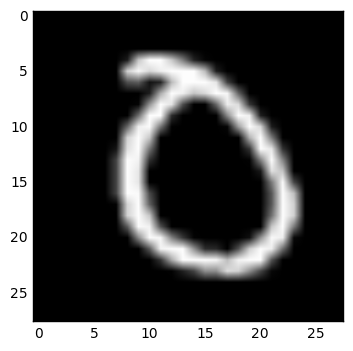

Classified as: 0


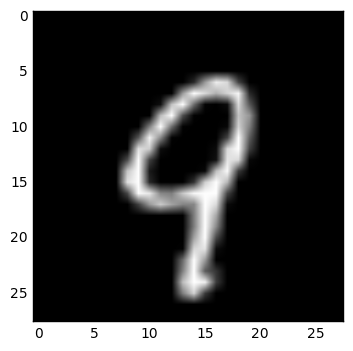

Classified as: 9


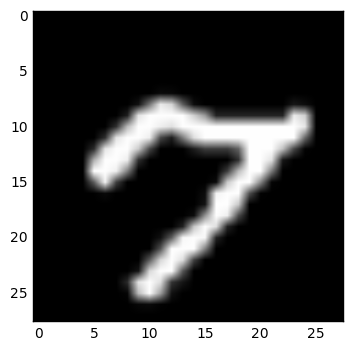

Classified as: 7


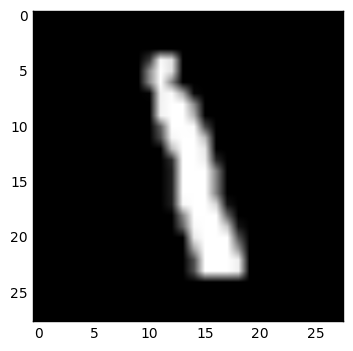

Classified as: 1


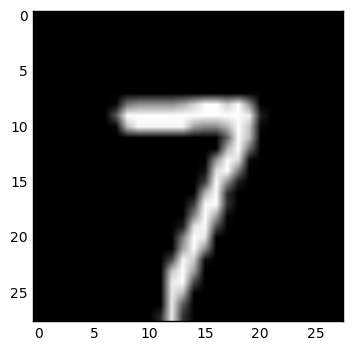

Classified as: 7


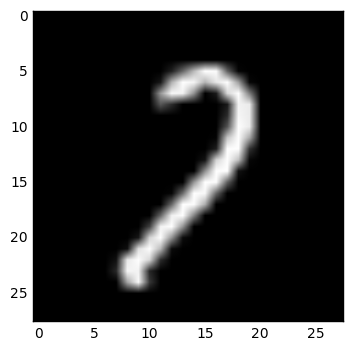

Classified as: 2


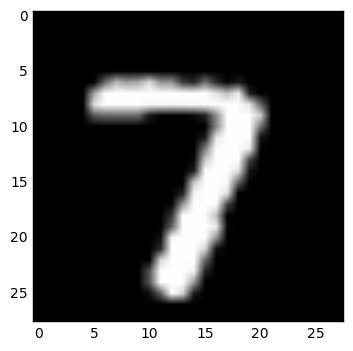

Classified as: 7


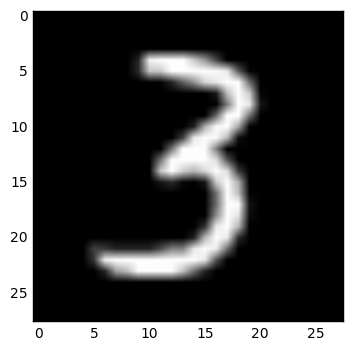

Classified as: 3


In [ ]:
import matplotlib.pyplot as plt
for i in range(20):
    batch = mnist.test.next_batch(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    plt.gray() # use this line if you don't want to see it in color
    plt.imshow(plotData)
    plt.show()

    answer = sess.run(Y, feed_dict={X: batch[0]})
    x  = sess.run(tf.argmax(answer, 1))
    print("Classified as: {:d}".format(x[0]))